In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
sns.set(palette='terrain')

In [195]:
df = pd.read_csv('sc_stats.csv')
df.head()

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus
0,35:39,7,12,0.583,0,1,0.000,0,0,NaN,1,1,2,7,4,0,2,2,14,7
1,39:05,5,9,0.556,2,3,0.667,0,0,NaN,0,2,2,4,1,0,5,3,12,-19
2,28:27,3,6,0.500,1,2,0.500,0,0,NaN,0,5,5,9,2,0,4,1,7,-4
3,21:32,1,5,0.200,0,1,0.000,3,4,0.75,0,1,1,3,0,0,6,0,5,-13
4,31:15,4,8,0.500,1,2,0.500,0,2,0.00,1,3,4,6,0,0,4,5,9,-5


In [196]:
def convert_mp(mp):
    minutes, sec = mp.split(':')
    return int(minutes) + round(int(sec) / 60, 5)

In [197]:
df['time played'] = df['mp'].apply(lambda row: convert_mp(row))

In [198]:
# df['+/- label'] = df['plus_minus'].apply(lambda row: True if row >= 0 else False)

In [199]:
df.drop('mp', axis=1, inplace=True)

In [200]:
df.head()

,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus,time played
0,7,12,0.583,0,1,0.000,0,0,NaN,1,1,2,7,4,0,2,2,14,7,35.65000
1,5,9,0.556,2,3,0.667,0,0,NaN,0,2,2,4,1,0,5,3,12,-19,39.08333
2,3,6,0.500,1,2,0.500,0,0,NaN,0,5,5,9,2,0,4,1,7,-4,28.45000
3,1,5,0.200,0,1,0.000,3,4,0.75,0,1,1,3,0,0,6,0,5,-13,21.53333
4,4,8,0.500,1,2,0.500,0,2,0.00,1,3,4,6,0,0,4,5,9,-5,31.25000


In [201]:
df = df.fillna(0)

In [202]:
df.nunique()

fg              21
fga             33
fg_pct         115
fg3             14
fg3a            21
fg3_pct         65
ft              16
fta             16
ft_pct          24
orb              6
drb             14
trb             14
ast             17
stl              8
blk              3
pf               7
tov             12
pts             52
plus_minus      71
time played    531
dtype: int64

In [203]:
df.isna().sum(axis=0)

fg             0
fga            0
fg_pct         0
fg3            0
fg3a           0
fg3_pct        0
ft             0
fta            0
ft_pct         0
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
pf             0
tov            0
pts            0
plus_minus     0
time played    0
dtype: int64

In [204]:
df_neg_pm = df[df['plus_minus'] <= 0]
df_pos_pm = df[df['plus_minus'] > 0]

In [205]:
offense = (df_neg_pm.select_dtypes(exclude='object').columns).tolist()
offense.remove('drb')
offense.remove('trb')
offense.remove('orb')
offense.remove('stl')
offense.remove('blk')
offense.remove('pf')

# These statistics are repetitive. I will use their 'made' versions of the respective statistics.
# fg3a, I will be using fg3 representing the number of 3 pointers Stephen Curry made in that game.
# fgta, I will be using ft representing the number of free throws Stephen Curry made in that game. 

offense.remove('fg3a')
offense.remove('fta')
offense.remove('plus_minus')

defense = ['stl', 'blk', 'pf', 'tov']
rebounds = ['orb', 'drb', 'trb']

In [206]:
offense, defense, rebounds

(['fg',
  'fga',
  'fg_pct',
  'fg3',
  'fg3_pct',
  'ft',
  'ft_pct',
  'ast',
  'tov',
  'pts',
  'time played'],
 ['stl', 'blk', 'pf', 'tov'],
 ['orb', 'drb', 'trb'])

# Offensive Feature Analysis

In [208]:
fontsize = 12.5
width = 20
height = 35

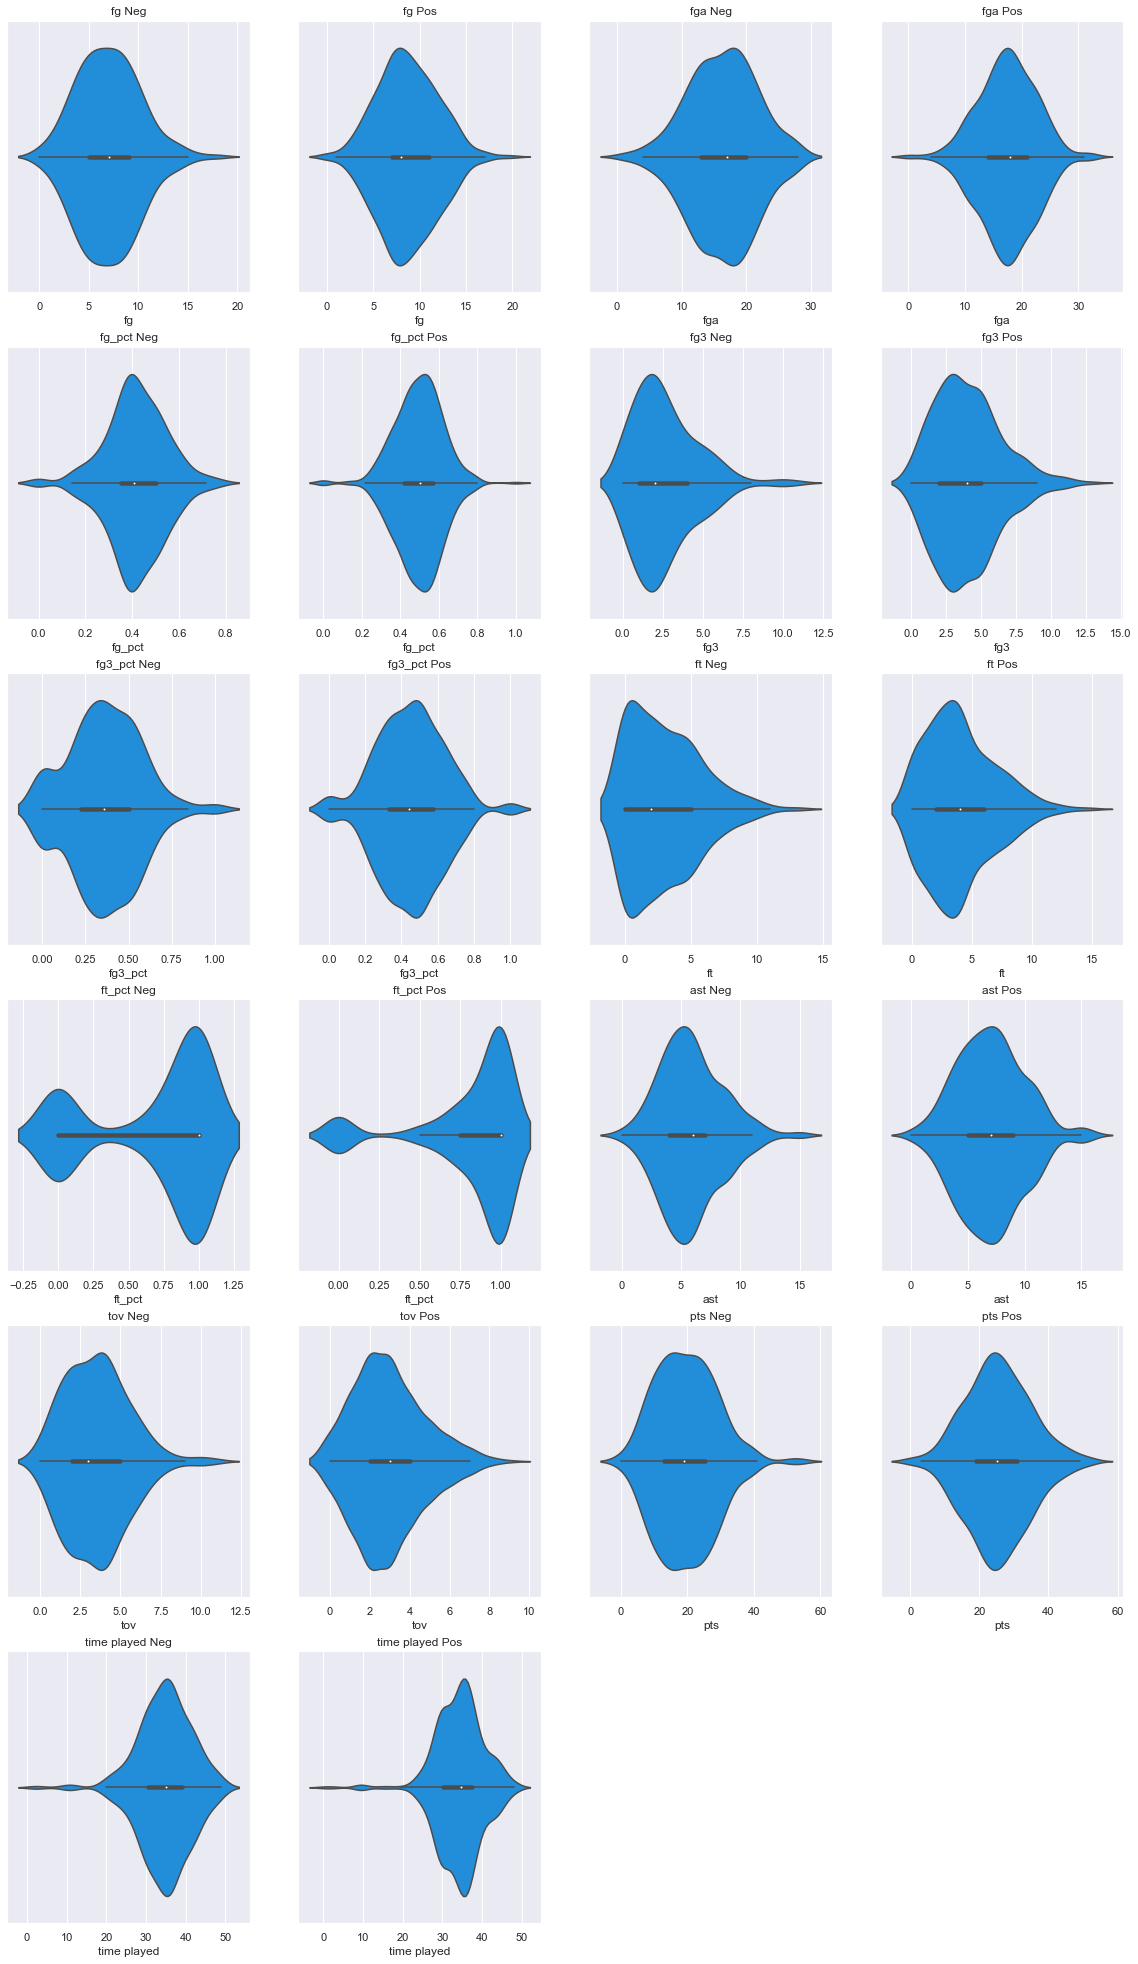

In [214]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

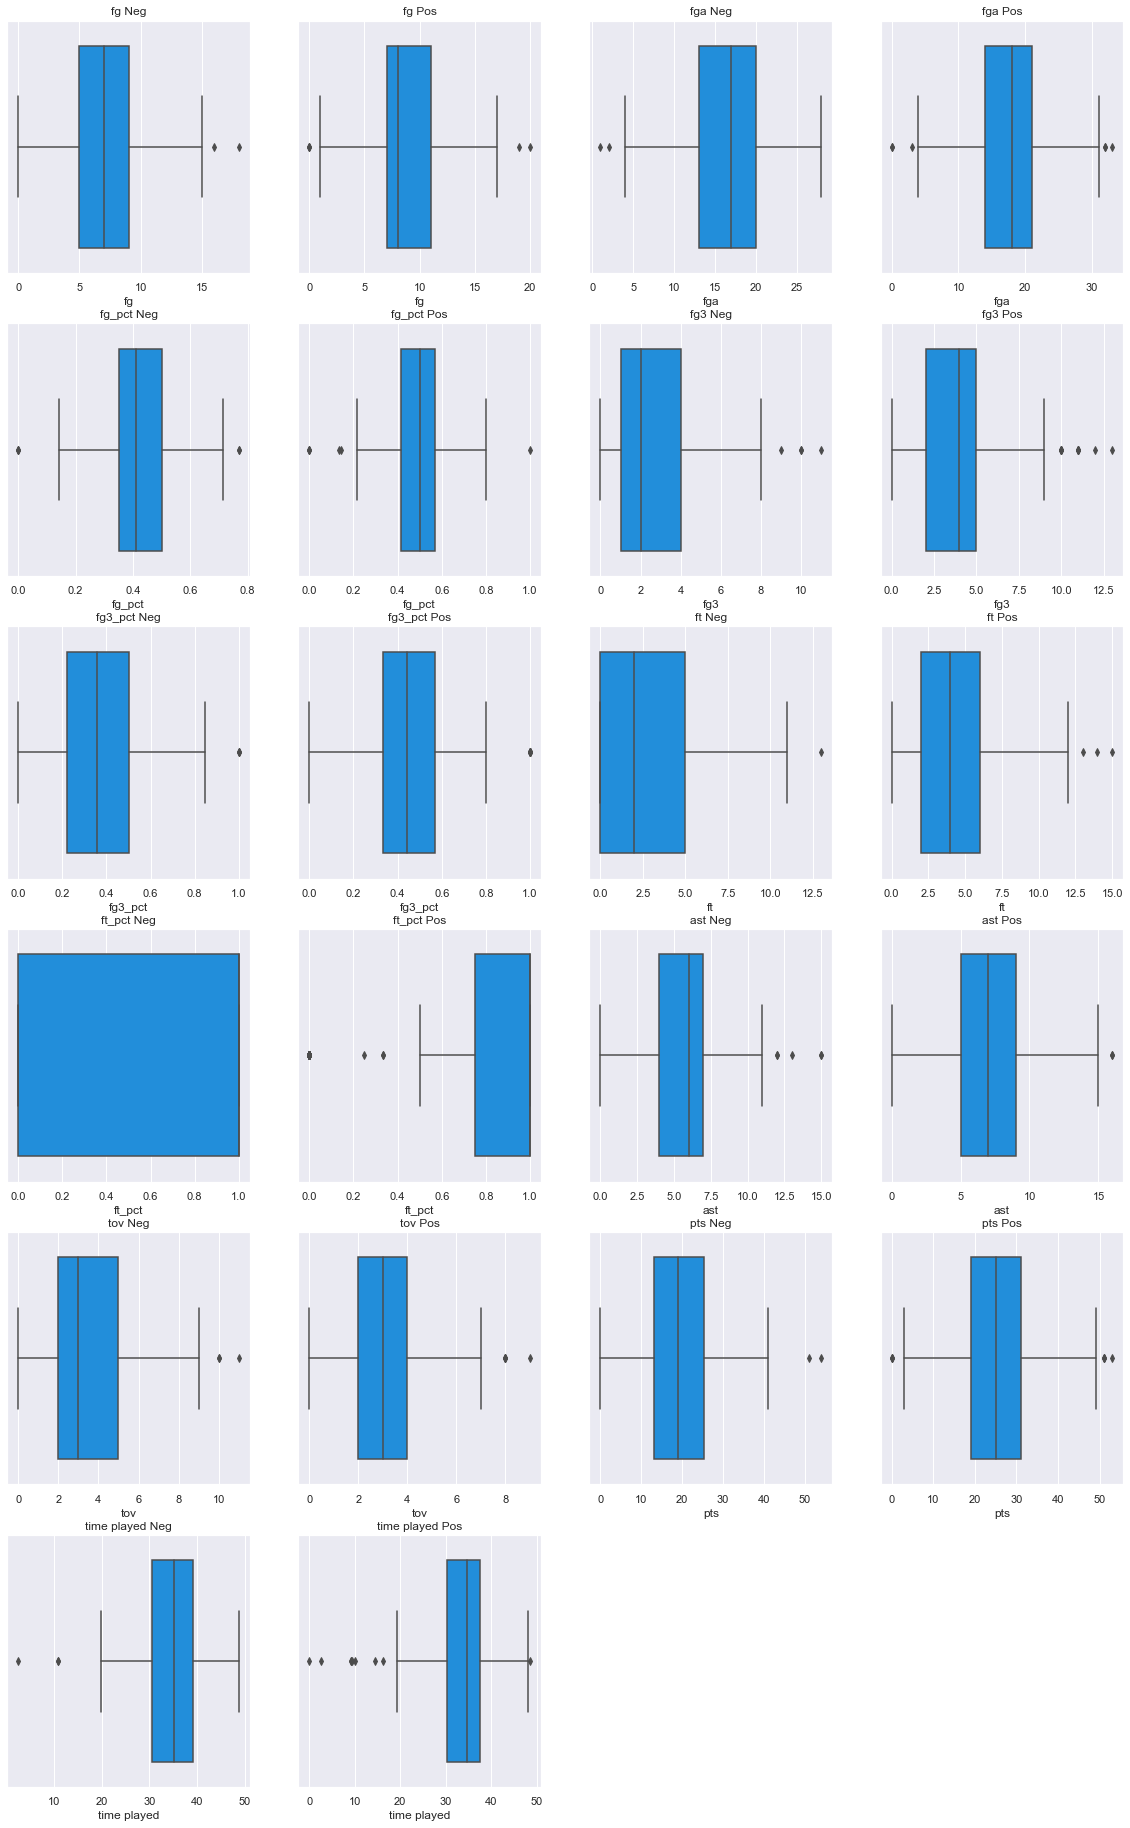

In [126]:
height = 32.5

fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

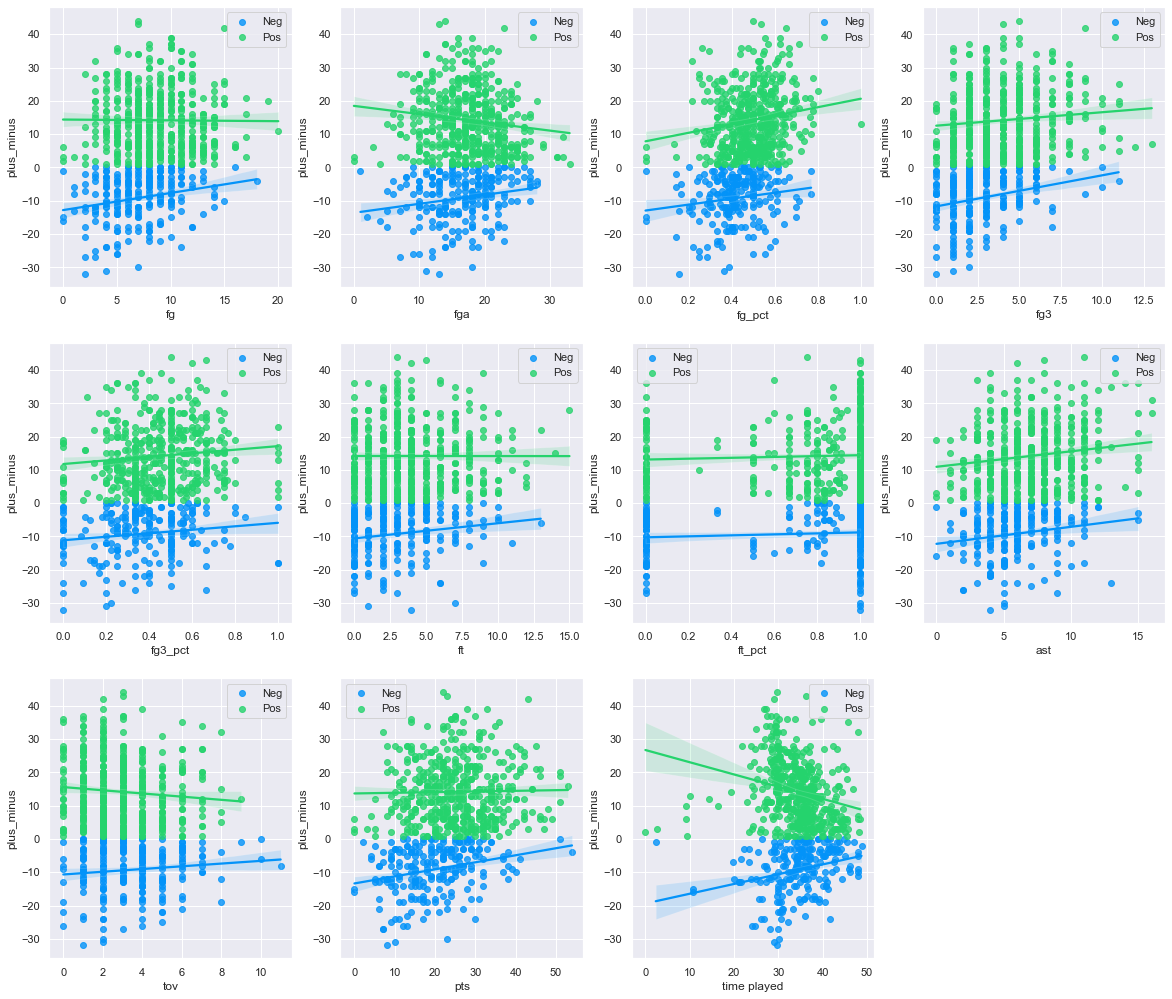

In [127]:
height = 17.5

fig = plt.figure(1, figsize=(width, height))
i = 0
rows = (len(offense) // 4) + 1

for col in offense:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    
    sns.regplot(df_neg_pm[col], df_neg_pm['plus_minus'], label='Neg') 
    sns.regplot(df_pos_pm[col], df_pos_pm['plus_minus'], label='Pos') 
    
    ax1.legend()

In [128]:
df_neg_pm['ast_tov_ratio'] = df_neg_pm['ast'].div(df_neg_pm['tov'].replace(0, np.inf))
df_pos_pm['ast_tov_ratio'] = df_pos_pm['ast'].div(df_pos_pm['tov'].replace(0, np.inf))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


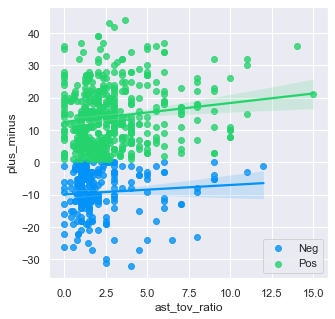

In [129]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['ast_tov_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['ast_tov_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

In [130]:
df_neg_pm['3fg_divided_by_fg'] = df_neg_pm['fg3'].div(df_neg_pm['fg'].replace(0, np.inf))
df_neg_pm['2fg_divided_by_fg'] = (df_neg_pm['fg'] - df_neg_pm['fg3']).div(df_neg_pm['fg'].replace(0, np.inf))

df_pos_pm['3fg_divided_by_fg'] = df_pos_pm['fg3'].div(df_pos_pm['fg'].replace(0, np.inf))
df_pos_pm['2fg_divided_by_fg'] = (df_pos_pm['fg'] - df_pos_pm['fg3']).div(df_pos_pm['fg'].replace(0, np.inf))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

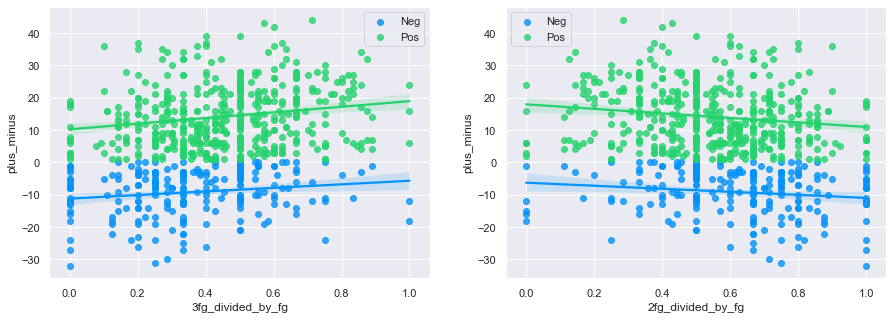

In [131]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['3fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['3fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax1.legend()

ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['2fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['2fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

# Defensive Features Analysis

In [132]:
width = 16.5
height = 21.5

In [215]:
defense

['stl', 'blk', 'pf', 'tov']

In [221]:
# Created vs Lost Possessions.

df_pos_pm['pos_responsible_for'] = df_pos_pm['fg'] + df_pos_pm['ast'] + df_pos_pm['stl'] + df_pos_pm['blk'] - df_pos_pm['tov']
df_neg_pm['pos_responsible_for'] = df_neg_pm['fg'] + df_neg_pm['ast'] + df_neg_pm['stl'] + df_neg_pm['blk'] - df_neg_pm['tov']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Net Pos for Pos +/-')

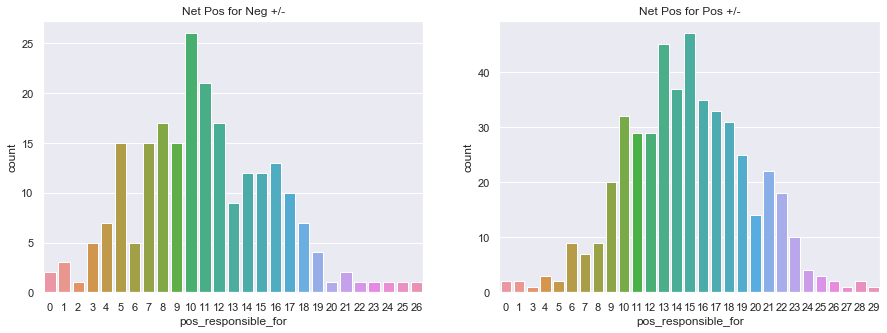

In [222]:
fig = plt.figure(1, figsize=(15, 5))
i = 0

ax = plt.subplot(1, 2, 1)
sns.countplot(df_neg_pm['pos_responsible_for'])
ax.set_title('Net Pos for Neg +/-')


ax = plt.subplot(1, 2, 2)
sns.countplot(df_pos_pm['pos_responsible_for'])
ax.set_title('Net Pos for Pos +/-')

In [223]:
# Negative possessions.

df_pos_pm['negative_pos'] = df_pos_pm['pf'] + df_pos_pm['tov'] + (df_pos_pm['fga'] - df_pos_pm['fg']) + (df_pos_pm['fg3a'] - df_pos_pm['fg3'])
df_neg_pm['negative_pos'] = df_neg_pm['pf'] + df_neg_pm['tov'] + (df_neg_pm['fga'] - df_neg_pm['fg']) + (df_neg_pm['fg3a'] - df_neg_pm['fg3'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

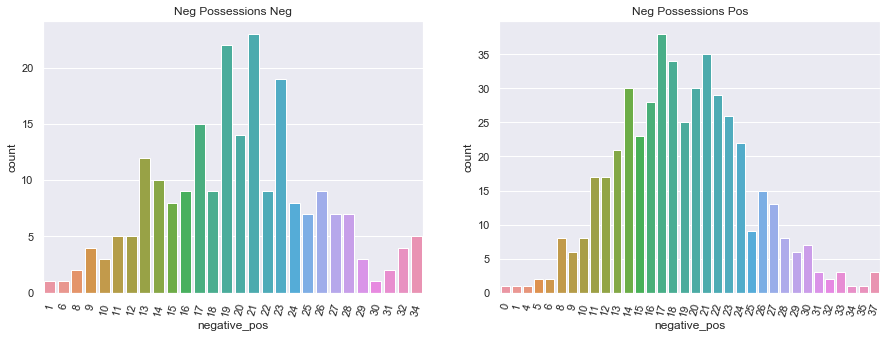

In [225]:
fig = plt.figure(1, figsize=(15, 5))
i = 0

ax = plt.subplot(1, 2, 1)
sns.countplot(df_neg_pm['negative_pos'])
ax.set_title('Neg Possessions Neg')
plt.xticks(rotation=75)

ax = plt.subplot(1, 2, 2)
sns.countplot(df_pos_pm['negative_pos'])
ax.set_title('Neg Possessions Pos')
plt.xticks(rotation=75)

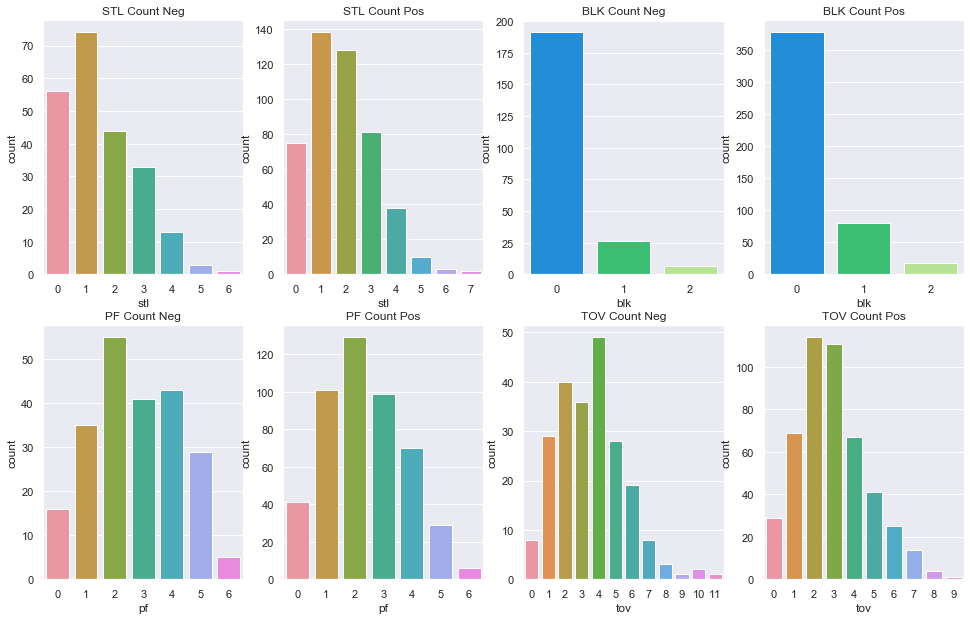

In [133]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in defense:
    i += 1
    ax1 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_neg_pm[col]) 
    ax1.set_title(f'{col.upper()} Count Neg')
    
    i += 1
    ax2 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_pos_pm[col]) 
    ax2.set_title(f'{col.upper()} Count Pos')

In [134]:
df_neg_pm['stl_per_f'] = df_neg_pm['stl'] / df_neg_pm['pf']
df_pos_pm['stl_per_f'] = df_pos_pm['stl'] / df_pos_pm['pf']

df_neg_pm['blk_per_f'] = df_neg_pm['blk'] / df_neg_pm['pf']
df_pos_pm['blk_per_f'] = df_pos_pm['blk'] / df_pos_pm['pf']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

/usr/local/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/site-packages/numpy/linalg/linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


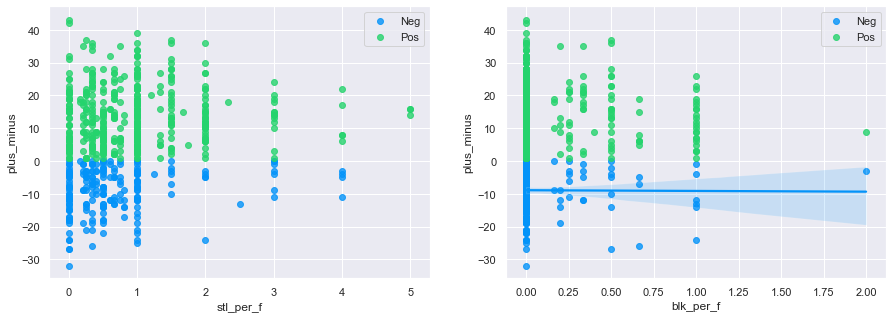

In [135]:
fig = plt.figure(1, figsize=(15, 5))
ax = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['stl_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['stl_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

# fig = plt.figure(1, figsize=(5, 5))
ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['blk_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['blk_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

# Rebounds

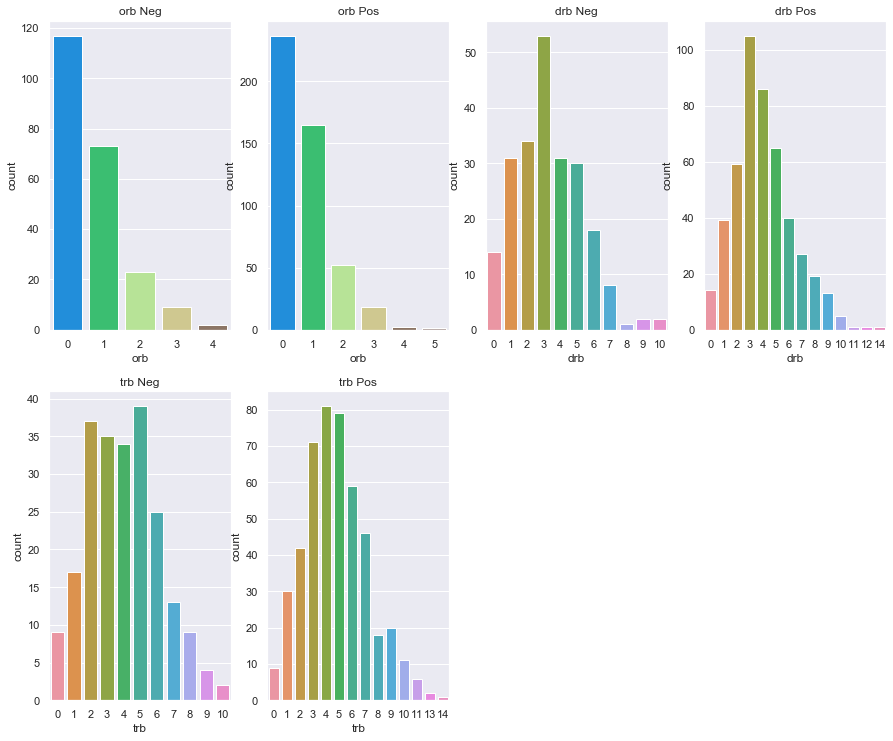

In [136]:
fig = plt.figure(1, figsize=(15, 12.5))
i = 0
rows = (len(rebounds) // 2) + 1

for rebound in rebounds:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    sns.countplot(df_neg_pm[rebound])
    ax1.set_title(f'{rebound} Neg')
    
    i += 1
    ax2 = plt.subplot(rows, 4, i)
    sns.countplot(df_pos_pm[rebound])
    ax2.set_title(f'{rebound} Pos')

In [137]:
df_neg_pm['orb_trb_ratio'] = df_neg_pm['orb'] / df_neg_pm['trb']
df_pos_pm['orb_trb_ratio'] = df_pos_pm['orb'] / df_pos_pm['trb']

df_neg_pm['drb_trb_ratio'] = df_neg_pm['drb'] / df_neg_pm['trb']
df_pos_pm['drb_trb_ratio'] = df_pos_pm['drb'] / df_pos_pm['trb']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

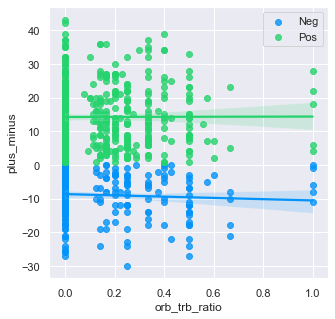

In [138]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['orb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['orb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

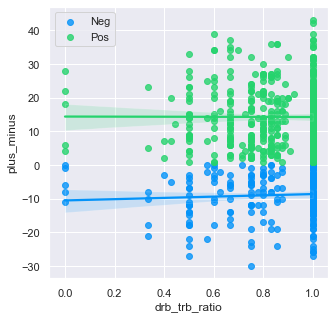

In [139]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['drb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['drb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

# Plus Minus Data Correlation Analysis

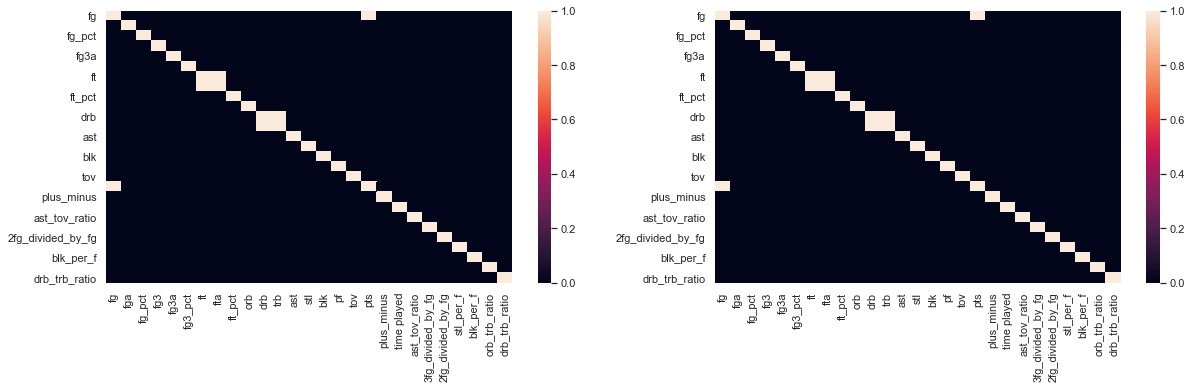

In [140]:
fig = plt.figure(figsize=(20, 5))
corr_cutoff = 0.9

ax = plt.subplot(1, 2, 1)
sns.heatmap(df_neg_pm.corr() > corr_cutoff)

ax = plt.subplot(1, 2, 2)
sns.heatmap(df_pos_pm.corr() > corr_cutoff)